In [38]:
from fyers_api import accessToken
from fyers_api.Websocket import ws
import pandas as pd
from fyers_api import accessToken
from fyers_api import fyersModel
import os
import math
import datetime
import csv

In [39]:
client_id='TAZ287TZUA-100'
secret_id='PPZ5ZG1YAR'
url='https://www.google.com/'
response_type = "code"
grant_type = "authorization_code"

In [40]:
session=accessToken.SessionModel(
    client_id=client_id,
    secret_key=secret_id,
    redirect_uri=url, 
    response_type=response_type,
    grant_type=grant_type
)

response = session.generate_authcode()
print(response)

https://api.fyers.in/api/v2/generate-authcode?client_id=TAZ287TZUA-100&redirect_uri=https%3A%2F%2Fwww.google.com%2F&response_type=code&state=None


In [41]:
auth_code='eyJ0eXAiOiJKV1QiLCJhbGciOiJIUzI1NiJ9.eyJpc3MiOiJhcGkubG9naW4uZnllcnMuaW4iLCJpYXQiOjE2OTYxNTgwNTIsImV4cCI6MTY5NjE4ODA1MiwibmJmIjoxNjk2MTU3NDUyLCJhdWQiOiJbXCJ4OjBcIiwgXCJ4OjFcIiwgXCJ4OjJcIiwgXCJkOjFcIiwgXCJkOjJcIiwgXCJ4OjFcIiwgXCJ4OjBcIl0iLCJzdWIiOiJhdXRoX2NvZGUiLCJkaXNwbGF5X25hbWUiOiJYTTA0MzQyIiwib21zIjoiSzEiLCJoc21fa2V5IjoiNWI3Mzg3ZTYxOGQzODllNGVjOGVmZjU1ODM0ZTBmMTA1NjdjYWU1ODk5YWQ5NWY3MzgxMTM3YTMiLCJub25jZSI6IiIsImFwcF9pZCI6IlRBWjI4N1RaVUEiLCJ1dWlkIjoiZDUyNjJjODgxYTk0NDdmZDlhZjQ2ODMwYmNjYmU1YmIiLCJpcEFkZHIiOiIwLjAuMC4wIiwic2NvcGUiOiIifQ.d9XMbCECjNRfqb4pLeTnroLQVHsrSjFZAvB5QocDLqg'

In [42]:
session.set_token(auth_code)
response = session.generate_token()
print(response)

{'s': 'ok', 'code': 200, 'message': '', 'access_token': 'eyJ0eXAiOiJKV1QiLCJhbGciOiJIUzI1NiJ9.eyJpc3MiOiJhcGkuZnllcnMuaW4iLCJpYXQiOjE2OTYxNTgwNjcsImV4cCI6MTY5NjIwNjYwNywibmJmIjoxNjk2MTU4MDY3LCJhdWQiOlsieDowIiwieDoxIiwieDoyIiwiZDoxIiwiZDoyIiwieDoxIiwieDowIl0sInN1YiI6ImFjY2Vzc190b2tlbiIsImF0X2hhc2giOiJnQUFBQUFCbEdWRnpHNTNSMF90TC1JbXVTMGJ2dzhodFlwSVNxV2llWTJTUWotNzlvSUlrZXcyREg4WVRXZWdQUHBuM0FCMWwyMXQzMzBLYWZLOFZZdFB5Ulh0VWdJQ0Rkd3o4bDd4blM2UV9mS0wxR3MyQ1BmUT0iLCJkaXNwbGF5X25hbWUiOiJNT0hBTU1FRCBSQVlZQU4gU0FJVCIsIm9tcyI6IksxIiwiaHNtX2tleSI6IjViNzM4N2U2MThkMzg5ZTRlYzhlZmY1NTgzNGUwZjEwNTY3Y2FlNTg5OWFkOTVmNzM4MTEzN2EzIiwiZnlfaWQiOiJYTTA0MzQyIiwiYXBwVHlwZSI6MTAwLCJwb2FfZmxhZyI6Ik4ifQ.ogmm1JQsJ-Feu_yQayiBkSgVaUOSncZILld3tOrpnzM', 'refresh_token': 'eyJ0eXAiOiJKV1QiLCJhbGciOiJIUzI1NiJ9.eyJpc3MiOiJhcGkuZnllcnMuaW4iLCJpYXQiOjE2OTYxNTgwNjcsImV4cCI6MTY5NzQxNjIwNywibmJmIjoxNjk2MTU4MDY3LCJhdWQiOlsieDowIiwieDoxIiwieDoyIiwiZDoxIiwiZDoyIiwieDoxIiwieDowIl0sInN1YiI6InJlZnJlc2hfdG9rZW4iLCJhdF9oYXNoIjoiZ0FBQU

In [43]:
access_token=response['access_token']

In [44]:
fyers=fyersModel.FyersModel(client_id=client_id,token=access_token,log_path=os.getcwd())

In [98]:
symbol="NSE:INFY-EQ"
data = {
    "symbol":symbol,
    "resolution":"5",
    "date_format":"1",
    "range_from":"2023-3-1",
    "range_to":"2023-3-28",
    "cont_flag":"1"
}

response = fyers.history(data=data)
print(response)

{'s': 'ok', 'candles': [[1677642300, 1492.4, 1494.4, 1485.0, 1489.2, 221794], [1677642600, 1490.1, 1494.05, 1490.05, 1491.0, 262698], [1677642900, 1491.0, 1491.5, 1486.75, 1487.15, 80385], [1677643200, 1487.15, 1491.0, 1487.15, 1491.0, 56089], [1677643500, 1491.0, 1496.0, 1489.0, 1494.8, 134936], [1677643800, 1495.0, 1497.55, 1492.85, 1495.0, 85410], [1677644100, 1494.4, 1496.0, 1492.5, 1494.0, 90466], [1677644400, 1494.0, 1494.5, 1488.0, 1489.0, 86854], [1677644700, 1488.95, 1489.9, 1481.5, 1482.35, 96384], [1677645000, 1482.6, 1489.15, 1482.6, 1489.15, 68352], [1677645300, 1489.15, 1489.5, 1487.0, 1487.15, 45349], [1677645600, 1487.2, 1488.95, 1487.2, 1487.35, 22896], [1677645900, 1487.0, 1488.0, 1485.0, 1488.0, 35658], [1677646200, 1488.0, 1489.0, 1487.4, 1487.8, 29815], [1677646500, 1487.8, 1492.0, 1486.45, 1491.0, 90161], [1677646800, 1491.0, 1492.45, 1489.95, 1491.4, 30791], [1677647100, 1491.35, 1493.4, 1489.0, 1492.2, 90228], [1677647400, 1492.2, 1492.95, 1491.0, 1491.95, 26797

In [99]:
candleSticks=response['candles']
#candleSticks=[]
#with open("./sbi.csv", 'r') as file:
 # csvreader = csv.reader(file)
  #for row in csvreader:
   # if(row[0]!='Time'):
    #  candleSticks.append([float(row[0]),float(row[1]),float(row[2]),float(row[3]),float(row[4]),float(row[5])])

In [100]:
closingValues=[]
candleSticksForDF=[]
for item in candleSticks:
    candleSticksForDF.append(item)
    closingValues.append(item[4])

In [101]:
valuesToPlot={'closingValues':closingValues,'candleStick':candleSticksForDF}
df = pd.DataFrame(valuesToPlot)
df

,closingValues,candleStick
0,1489.20,"[1677642300, 1492.4, 1494.4, 1485.0, 1489.2, 2..."
1,1491.00,"[1677642600, 1490.1, 1494.05, 1490.05, 1491.0,..."
2,1487.15,"[1677642900, 1491.0, 1491.5, 1486.75, 1487.15,..."
3,1491.00,"[1677643200, 1487.15, 1491.0, 1487.15, 1491.0,..."
4,1494.80,"[1677643500, 1491.0, 1496.0, 1489.0, 1494.8, 1..."
...,...,...
1420,1377.50,"[1679996100, 1377.65, 1378.6, 1377.05, 1377.5,..."
1421,1378.00,"[1679996400, 1377.55, 1378.7, 1376.7, 1378.0, ..."
1422,1377.60,"[1679996700, 1378.0, 1378.5, 1377.45, 1377.6, ..."
1423,1377.00,"[1679997000, 1377.5, 1378.7, 1376.55, 1377.0, ..."


In [102]:
small_lookback = 5
df['mean'] = df['closingValues'].ewm(span=5).mean()

In [103]:
import pandas as pd

# Assuming you have your price data in a DataFrame 'df' under the 'candleStick' column

# Define the window and standard deviation multiplier
window = 10  # You can adjust this window size as needed
std_dev_multiplier = 1.5  # Multiplier for standard deviation

# Calculate the rolling mean (SMA) and rolling standard deviation
df['SMA'] = df['candleStick'].apply(lambda x: pd.Series(x[4])).rolling(window=window).mean()
df['StdDev'] = df['candleStick'].apply(lambda x: pd.Series(x[4])).rolling(window=window).std()

# Calculate the upper and lower Bollinger Bands
df['Upper_Band'] = df['SMA'] + (std_dev_multiplier * df['StdDev'])
df['Lower_Band'] = df['SMA'] - (std_dev_multiplier * df['StdDev'])

# Print the resulting DataFrame 'df' with Bollinger Bands
print(df)

      closingValues                                        candleStick  \
0           1489.20  [1677642300, 1492.4, 1494.4, 1485.0, 1489.2, 2...   
1           1491.00  [1677642600, 1490.1, 1494.05, 1490.05, 1491.0,...   
2           1487.15  [1677642900, 1491.0, 1491.5, 1486.75, 1487.15,...   
3           1491.00  [1677643200, 1487.15, 1491.0, 1487.15, 1491.0,...   
4           1494.80  [1677643500, 1491.0, 1496.0, 1489.0, 1494.8, 1...   
...             ...                                                ...   
1420        1377.50  [1679996100, 1377.65, 1378.6, 1377.05, 1377.5,...   
1421        1378.00  [1679996400, 1377.55, 1378.7, 1376.7, 1378.0, ...   
1422        1377.60  [1679996700, 1378.0, 1378.5, 1377.45, 1377.6, ...   
1423        1377.00  [1679997000, 1377.5, 1378.7, 1376.55, 1377.0, ...   
1424        1378.60  [1679997300, 1376.95, 1378.7, 1375.85, 1378.6,...   

             mean       SMA    StdDev   Upper_Band   Lower_Band  
0     1489.200000       NaN       NaN        

In [104]:
import pandas as pd
import numpy as np


def rsi_tradingview(ohlc: pd.DataFrame, period: int = 14, round_rsi: bool = True):
    """ Implements the RSI indicator as defined by TradingView on March 15, 2021.
        The TradingView code is as follows:
        //@version=4
        study(title="Relative Strength Index", shorttitle="RSI", format=format.price, precision=2, resolution="")
        len = input(14, minval=1, title="Length")
        src = input(close, "Source", type = input.source)
        up = rma(max(change(src), 0), len)
        down = rma(-min(change(src), 0), len)
        rsi = down == 0 ? 100 : up == 0 ? 0 : 100 - (100 / (1 + up / down))
        plot(rsi, "RSI", color=#8E1599)
        band1 = hline(70, "Upper Band", color=#C0C0C0)
        band0 = hline(30, "Lower Band", color=#C0C0C0)
        fill(band1, band0, color=#9915FF, transp=90, title="Background")

    :param ohlc:
    :param period:
    :param round_rsi:
    :return: an array with the RSI indicator values
    """

    delta = ohlc["closingValues"].diff()

    up = delta.copy()
    up[up < 0] = 0
    up = pd.Series.ewm(up, alpha=1/period).mean()

    down = delta.copy()
    down[down > 0] = 0
    down *= -1
    down = pd.Series.ewm(down, alpha=1/period).mean()

    rsi = np.where(up == 0, 0, np.where(down == 0, 100, 100 - (100 / (1 + up / down))))

    return np.round(rsi, 2) if round_rsi else rsi

In [105]:
import pandas as pd




def stoch_rsi_tradingview(ohlc: pd.DataFrame, period=14, smoothK=3, smoothD=3):
    """ Calculating Stochastic RSI (gives the same values as TradingView as of March 20, 2021.
        smoothK = input(3, "K", minval=1)
        smoothD = input(3, "D", minval=1)
        lengthRSI = input(14, "RSI Length", minval=1)
        lengthStoch = input(14, "Stochastic Length", minval=1)
        src = input(close, title="RSI Source")
        rsi1 = rsi(src, lengthRSI)
        k = sma(stoch(rsi1, rsi1, rsi1, lengthStoch), smoothK)
        d = sma(k, smoothD)

    :param ohlc:
    :param period:
    :param smoothK:
    :param smoothD:
    :return:
    """
    # Calculate RSI
    rsi = rsi_tradingview(ohlc, period=period, round_rsi=False)

    # Calculate StochRSI
    rsi = pd.Series(rsi)
    stochrsi  = (rsi - rsi.rolling(period).min()) / (rsi.rolling(period).max() - rsi.rolling(period).min())
    stochrsi_K = stochrsi.rolling(smoothK).mean()
    stochrsi_D = stochrsi_K.rolling(smoothD).mean()
    df['stochrsi_K']=round(stochrsi_K * 100, 2)
    df['stochrsi_D']=round(stochrsi_D * 100, 2)
    return round(rsi, 2), round(stochrsi_K * 100, 2), round(stochrsi_D * 100, 2)

In [106]:
stoch_rsi_tradingview(df)

(0          NaN
 1       100.00
 2        30.27
 3        60.18
 4        72.65
          ...  
 1420     35.83
 1421     38.88
 1422     37.35
 1423     35.12
 1424     44.63
 Length: 1425, dtype: float64,
 0         NaN
 1         NaN
 2         NaN
 3         NaN
 4         NaN
         ...  
 1420    34.52
 1421    22.96
 1422    27.95
 1423    23.64
 1424    42.48
 Length: 1425, dtype: float64,
 0         NaN
 1         NaN
 2         NaN
 3         NaN
 4         NaN
         ...  
 1420    60.56
 1421    39.92
 1422    28.48
 1423    24.85
 1424    31.36
 Length: 1425, dtype: float64)

In [108]:
counter=0
entryPrice=-420
stopLoss=-420
reward=3
buying=0
slCounter=0
tpCounter=0
eodCounter=0
stopLossCounterForDay=0
for index, row in df.iterrows():
    if(str(datetime.datetime.fromtimestamp(df['candleStick'][index][0]).time())=='15:15:00'):
        print('StopLoss on '+str(datetime.datetime.fromtimestamp(df['candleStick'][index][0]))+' hit '+str(stopLossCounterForDay)+' times')
        stopLossCounterForDay=0
    if(buying==1):
        if(str(datetime.datetime.fromtimestamp(df['candleStick'][index][0]).time())=='15:15:00'):
            print(symbol+' EOD Exit at '+str(df['candleStick'][index][4]))
            eodCounter=eodCounter+((df['candleStick'][index][4]-entryPrice)/(entryPrice-stopLoss))
            counter=0
            entryPrice=-420
            stopLoss=-420
            reward=3
            buying=0
    if(stopLossCounterForDay<2):
        if not math.isnan(df['mean'][index]):
            if not((df['mean'][index]<= df['candleStick'][index][2]) and (df['mean'][index]>= df['candleStick'][index][3])):
                if(buying!=1):
                    if(df['mean'][index]<df['candleStick'][index][2]):
                        print(symbol+' Reference Candle '+str(datetime.datetime.fromtimestamp(df['candleStick'][index][0])))
                        entryPrice=df['candleStick'][index][3]
                        stopLoss=df['candleStick'][index][2]+0.2
            else:
                if(entryPrice!=-420 and stopLoss!=-420):
                    if(buying==0):
                        print(symbol+' Sell Triggered at '+str(entryPrice)+' '+str(datetime.datetime.fromtimestamp(df['candleStick'][index][0])))
                        buying=1
                    if(df['candleStick'][index][2]>=stopLoss):
                        stopLossCounterForDay=stopLossCounterForDay+1
                        print(symbol+' SL hit at '+str(stopLoss)+' '+str(datetime.datetime.fromtimestamp(df['candleStick'][index][0])))
                        buying=0
                        entryPrice=-420
                        stopLoss=-420
                        slCounter=slCounter+1
                        continue
                    targetPrice=entryPrice+((entryPrice-stopLoss)*reward)
                    if(df['candleStick'][index][3]<=targetPrice and df['stochrsi_K'][index]>=df['stochrsi_D'][index]):
                        buying=0
                        print(symbol+' TP hit at '+str(df['candleStick'][index][4])+' '+str(datetime.datetime.fromtimestamp(df['candleStick'][index][0])))
                        tpCounter=tpCounter+((df['candleStick'][index][4]-entryPrice)/(entryPrice-stopLoss))
                        entryPrice=-420
                        stopLoss=-420
      
print('TP:'+str(tpCounter))
print('SL:'+str(slCounter*-1))
roundValueForEOD=round(eodCounter,3)
print('EOD:'+str(roundValueForEOD))
roundValueForNet=round(((tpCounter)+(slCounter*-1)+(eodCounter)),3)
print('Net For Period='+ str(roundValueForNet))


NSE:INFY-EQ Reference Candle 2023-03-01 10:30:00
NSE:INFY-EQ Sell Triggered at 1489.95 2023-03-01 10:35:00
NSE:INFY-EQ SL hit at 1492.65 2023-03-01 10:35:00
NSE:INFY-EQ Reference Candle 2023-03-01 10:50:00
NSE:INFY-EQ Sell Triggered at 1492.0 2023-03-01 10:55:00
NSE:INFY-EQ SL hit at 1493.4 2023-03-01 10:55:00
StopLoss on 2023-03-01 15:15:00 hit 2 times
NSE:INFY-EQ Reference Candle 2023-03-02 10:35:00
NSE:INFY-EQ Reference Candle 2023-03-02 10:40:00
NSE:INFY-EQ Sell Triggered at 1474.0 2023-03-02 10:45:00
NSE:INFY-EQ SL hit at 1475.6000000000001 2023-03-02 11:00:00
NSE:INFY-EQ Reference Candle 2023-03-02 11:50:00
NSE:INFY-EQ Sell Triggered at 1475.95 2023-03-02 11:55:00
NSE:INFY-EQ SL hit at 1476.8 2023-03-02 11:55:00
StopLoss on 2023-03-02 15:15:00 hit 2 times
NSE:INFY-EQ Reference Candle 2023-03-03 09:15:00
NSE:INFY-EQ Reference Candle 2023-03-03 09:20:00
NSE:INFY-EQ Sell Triggered at 1479.15 2023-03-03 09:25:00
NSE:INFY-EQ SL hit at 1483.3500000000001 2023-03-03 14:55:00
StopLoss on

<Axes: >

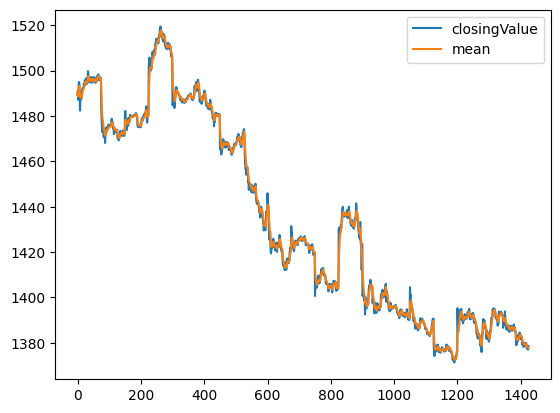

In [109]:
objForGraph={'closingValue':df['closingValues'],'mean':df['mean']}
dfToPlot = pd.DataFrame(objForGraph)
dfToPlot.plot()
